# Task 3: Fare Investigator 💰
Investigate ticket price impact on survival!


In [1]:
import pandas as pd
df = pd.read_csv('data/train.csv')
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


*Load and preprocess data: encode categories, fill missing values, and add FamilySize.*

In [2]:
df['FarePerPerson'] = df['Fare'] / df['FamilySize']
def get_fare_cat(fare):
    if fare == 0:
        return 'Free'
    elif fare <= 10:
        return 'Cheap'
    elif fare <= 50:
        return 'Moderate'
    else:
        return 'Expensive'
df['FareCategory'] = df['FarePerPerson'].apply(get_fare_cat)


*Create new features: FarePerPerson and fare category. This allows analysis of ticket price impact per passenger.*

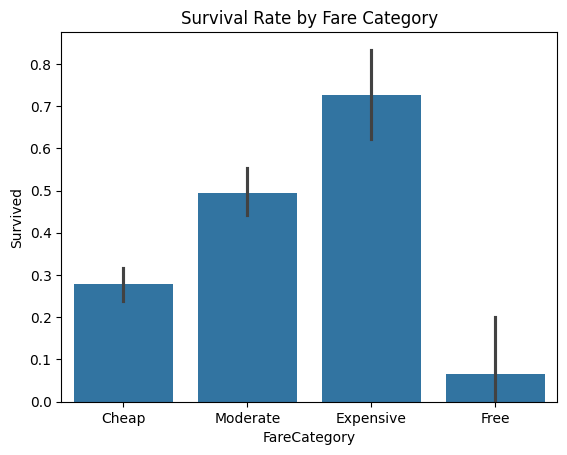

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x='FareCategory', y='Survived', data=df)
plt.title("Survival Rate by Fare Category")
plt.show()


- Penumpang dengan tiket mahal memiliki peluang selamat jauh lebih tinggi, 
- sementara mereka yang gratis hampir tidak selamat sama sekali.

*Visualize survival rates across different fare categories. Look for trends—did people with expensive tickets survive more?*

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X1 = df[['Fare', 'Pclass', 'Sex', 'Age', 'FamilySize']]
X2 = df[['FarePerPerson', 'Pclass', 'Sex', 'Age', 'FamilySize']]
y = df['Survived']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X1_train, y1_train)
acc_fare = model.score(X1_test, y1_test)
model.fit(X2_train, y2_train)
acc_perperson = model.score(X2_test, y2_test)
print("Accuracy with total Fare:", acc_fare)
print("Accuracy with FarePerPerson:", acc_perperson)


Accuracy with total Fare: 0.8044692737430168
Accuracy with FarePerPerson: 0.8044692737430168


*Compare model accuracy using total fare vs fare per person as input features. Which one is more predictive?*

**Task 3 Answers**

**Does fare per person predict survival better than total fare?**  
No, in this experiment, using FarePerPerson did not improve model accuracy compared to the total fare—both achieved an accuracy of 80.4%. So, for this dataset, dividing fare by family size didn't provide a predictive advantage.

**Were expensive tickets worth it for survival?**  
Yes, passengers in the Expensive fare category had a much higher survival rate, as shown in the bar chart. This suggests that higher-class tickets (with higher fares) significantly increased survival chances—likely because they were closer to lifeboats or received priority during evacuation.

**Why might some passengers have free tickets?**  
Some passengers may have received free tickets because they were staff, crew members, or received sponsored or complimentary passages. The survival rate for this group was the lowest, which could reflect their lower priority during rescue operations or that they were part of the working crew.